In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import sklearn as sk
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"processedweather.csv")

In [4]:
df
df = df.drop(columns='Unnamed: 0')

In [5]:
df['targettemp'] = df.shift(-1)['tmax']
df

,time,tavg,tmin,tmax,prcp,targettemp
0,1990-01-01,25.2,22.8,28.4,0.5,29.1
1,1990-01-02,24.9,21.7,29.1,0.0,29.8
2,1990-01-03,25.6,21.4,29.8,0.0,28.7
3,1990-01-04,25.7,21.4,28.7,0.0,28.4
4,1990-01-05,25.5,20.7,28.4,0.0,26.1
...,...,...,...,...,...,...
11889,2022-07-21,28.4,24.5,32.8,21.1,32.2
11890,2022-07-22,27.8,24.6,32.2,22.1,32.6
11891,2022-07-23,27.4,24.7,32.6,18.6,33.3
11892,2022-07-24,27.8,25.0,33.3,9.1,32.6


In [6]:
df= df.iloc[:-1:].copy()  #iloc- to access specified integer values of the dataframe - indexing dataframe
df=df.set_index('time')
df

,tavg,tmin,tmax,prcp,targettemp
time,,,,,
1990-01-01,25.2,22.8,28.4,0.5,29.1
1990-01-02,24.9,21.7,29.1,0.0,29.8
1990-01-03,25.6,21.4,29.8,0.0,28.7
1990-01-04,25.7,21.4,28.7,0.0,28.4
1990-01-05,25.5,20.7,28.4,0.0,26.1
...,...,...,...,...,...
2022-07-20,28.9,26.2,33.0,9.3,32.8
2022-07-21,28.4,24.5,32.8,21.1,32.2
2022-07-22,27.8,24.6,32.2,22.1,32.6


In [7]:
#Ridge regression to predict future temperature
from sklearn.linear_model import Ridge

r= Ridge(alpha=.1)

In [8]:
predictors=['tavg','tmin','tmax','prcp']

In [9]:
x=df[predictors]
y=df['targettemp']

In [10]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)

In [11]:
r.fit(x_train,y_train)

Ridge(alpha=0.1)

In [12]:
predictions=r.predict(x_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
error = mean_absolute_error(y_test,predictions)
error

0.9173883168391833

In [14]:
combined = pd.concat([y_test, pd.Series(predictions, index=y_test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [15]:
combined.tail(15)


,actual,predictions
time,,
2013-05-18,37.5,38.038898
2004-12-19,30.1,30.324828
2000-03-10,33.5,33.498972
2007-08-17,34.0,34.078357
1993-10-11,32.4,32.536662
2020-10-13,34.0,34.315001
2015-09-02,36.8,36.813640
1991-02-21,31.6,31.677368
1998-03-22,35.3,34.019629


<Axes: xlabel='time'>

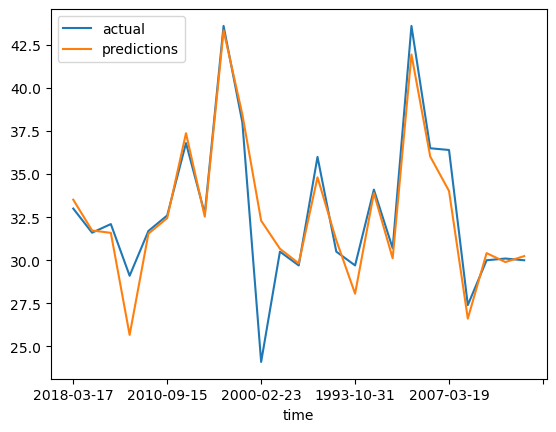

In [16]:
combined.head(25).plot()

In [17]:
r.coef_   #finding effect of each variable on target variable

array([ 0.45141709, -0.04752004,  0.63045028,  0.00256304])

In [18]:
df = df.iloc[30:,:].copy()

In [19]:
def create_predictions(predictors, df, r):
    x = df[predictors]
    y = df['targettemp']
    x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=42)

    r.fit(x_train, y_train)
    predictions = r.predict(x_test)

    error = mean_squared_error(y_test, predictions)
    
    combined = pd.concat([y_test, pd.Series(predictions, index=y_test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [20]:
r.coef_

array([ 0.45141709, -0.04752004,  0.63045028,  0.00256304])

In [21]:

df.corr()["targettemp"]

tavg          0.885771
tmin          0.743975
tmax          0.915774
prcp         -0.190939
targettemp    1.000000
Name: targettemp, dtype: float64

In [22]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [23]:
combined.sort_values("diff", ascending=False)

,actual,predictions,diff
time,,,
2000-02-23,24.1,32.296710,8.196710
1998-07-31,29.7,36.917239,7.217239
1991-06-03,26.9,34.034752,7.134752
2001-06-02,31.9,38.613689,6.713689
1995-05-05,26.5,32.533012,6.033012
...,...,...,...
2011-10-04,34.8,34.798313,0.001687
2000-03-10,33.5,33.498972,0.001028
2019-02-26,34.0,34.000625,0.000625


In [42]:
# precipitation

df['tprcp'] = df.shift(-1)['prcp']
df
df= df.iloc[:-1:].copy()  #iloc- to access specified integer values of the dataframe - indexing dataframe
df

,tavg,tmin,tmax,prcp,targettemp,tprcp
time,,,,,,
1990-01-31,23.7,20.1,29.8,0.0,30.0,0.0
1990-02-01,23.8,18.6,30.0,0.0,29.6,0.0
1990-02-02,24.6,19.1,29.6,0.0,30.1,0.0
1990-02-03,23.9,19.4,30.1,0.0,30.1,31.0
1990-02-04,24.3,19.4,30.1,31.0,30.1,0.0
...,...,...,...,...,...,...
2022-07-16,29.9,25.0,35.9,6.5,33.0,8.5
2022-07-17,28.4,25.7,33.0,8.5,32.0,2.2
2022-07-18,28.2,25.5,32.0,2.2,33.7,3.1


In [43]:
x_=df[predictors]
y_=df['tprcp']

In [44]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_,y_ , test_size=0.2, random_state=42)

In [45]:
r.fit(x_train_,y_train_)

Ridge(alpha=0.1)

In [46]:
predictions_=r.predict(x_test_)

In [47]:
error_ = mean_absolute_error(y_test_,predictions_)
error_

5.479845963374983

In [49]:
combined_ = pd.concat([y_test_, pd.Series(predictions_, index=y_test_.index)], axis=1)
combined_.columns = ["actual_prcp", "predictions_prcp"]
combined_

,actual_prcp,predictions_prcp
time,,
2004-05-27,0.0,3.606058
1993-08-05,41.9,6.093767
2021-09-20,14.7,6.165297
1995-01-10,0.0,4.985053
2012-10-17,36.1,13.033778
...,...,...
2009-06-16,0.0,1.026426
1998-04-15,0.0,4.888176
2016-11-06,0.0,-1.291366


In [52]:
combined_["diff_"] = (combined_["actual_prcp"] - combined_["predictions_prcp"]).abs()
combined_

,actual_prcp,predictions_prcp,diff_
time,,,
2004-05-27,0.0,3.606058,3.606058
1993-08-05,41.9,6.093767,35.806233
2021-09-20,14.7,6.165297,8.534703
1995-01-10,0.0,4.985053,4.985053
2012-10-17,36.1,13.033778,23.066222
...,...,...,...
2009-06-16,0.0,1.026426,1.026426
1998-04-15,0.0,4.888176,4.888176
2016-11-06,0.0,-1.291366,1.291366


In [ ]:
df["month_max"] = df["tmax"].rolling(30).mean()

df["month_day_max"] = df["month_max"] / df["tmax"]

df["max_min"] = df["tmax"] /df["tmin"]


In [ ]:
predictors = ["prcp", "tmax", "tmin", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, df, r)
error